<a href="https://colab.research.google.com/github/BharathHKrishna/Bharath/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
labels_train = np.array(y_train).reshape(-1,1)
labels_test = np.array(y_test).reshape(-1,1)

In [ ]:
onehot=OneHotEncoder()
onehot.fit(labels_train)
labels_train = onehot.transform(labels_train)
labels_test= onehot.transform(labels_test)

In [ ]:
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [ ]:
images_train = np.array(x_train).reshape(60000,28,28,1)/255
images_test = np.array(x_test).reshape(10000,28,28,1)/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

In [ ]:
#Sequential API
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,938 (331.79 KB)

 Trainable params: 84,938 (331.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Functional API

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input = Input(shape=(28,28,1))
conv1=Conv2D(32,(3,3),activation='relu',padding='same')(input)
pool1=MaxPooling2D(pool_size=(2,2))(conv1)
conv2= Conv2D(64,(3,3),activation='relu',  padding='same')(pool1)
pool2= MaxPooling2D(pool_size=(2,2))(conv2)
conv3= Conv2D(32,(3,3),activation='relu',  padding='same')(pool2)
pool3= MaxPooling2D(pool_size=(2,2))(conv3)

flat1=Flatten()(pool3)

dense1=Dense(128, activation='relu')(flat1)
drop1= Dropout(0.2)(dense1)
dense2=Dense(64, activation='relu')(drop1)
drop2= Dropout(0.3)(dense2)
dense3=Dense(32, activation='relu')(drop2)
drop3=Dropout(0.2)(dense3)
dense4= Dense(10, activation='softmax')(drop3)

model=Model(inputs=input, outputs=dense4)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,938 (331.79 KB)

 Trainable params: 84,938 (331.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(images_train,labels_train, validation_data=[images_test,labels_test], epochs=10, batch_size=1000,verbose=1)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.3279 - loss: 1.8706 - val_accuracy: 0.9202 - val_loss: 0.3045
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8566 - loss: 0.4587 - val_accuracy: 0.9682 - val_loss: 0.1089
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9380 - loss: 0.2274 - val_accuracy: 0.9783 - val_loss: 0.0746
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9578 - loss: 0.1597 - val_accuracy: 0.9806 - val_loss: 0.0644
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9663 - loss: 0.1291 - val_accuracy: 0.9827 - val_loss: 0.0566
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9708 - loss: 0.1102 - val_accuracy: 0.9840 - val_loss: 0.0522
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9762 - loss: 0.0898 - val_accuracy: 0.9873 - val_loss: 0.0431
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9791 - loss: 0.0830 - val_accuracy: 0.9881 - 

In [ ]:
p=model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
labels_predicted=np.argmax(p,1)

In [ ]:
pd.crosstab(np.argmax(labels_test,axis=1),labels_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,0,1,0,0,0,1,1,0,0
1,0,1130,1,1,0,0,1,2,0,0
2,2,2,1025,0,0,0,0,3,0,0
3,1,0,3,997,0,4,0,4,1,0
4,0,0,1,0,979,0,2,0,0,0
5,2,0,1,4,0,881,1,1,0,2
6,5,4,0,0,3,2,943,0,1,0
7,0,1,4,0,1,0,0,1021,1,0
8,5,1,4,1,1,2,2,4,949,5


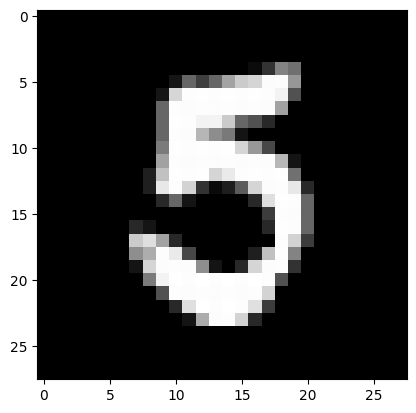

5

In [ ]:
import matplotlib.pyplot as plt

ind=1089
sample_image =images_test[ind,:,:,:]

pixels=sample_image.reshape((28,28,1))
plt.imshow(pixels,cmap='gray')
plt.show()

labels_predicted[ind]

In [ ]:
labels_predicted[ind]

5